In [1]:
#from --future-- import division
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv('churndms.csv')
col_names = churn_df.columns.tolist()
print ("Column names:")
print (col_names)

Column names:
['customercode', 'monthsactive', 'p0_1_count', 'p0_1_mit_hours', 'avg_mit_hrs', 'sump95', 'avgP95', 'data_transferred', 'avgdt', 'Churn?']


In [3]:
churn_df = pd.read_csv('churndms.csv')
col_names = churn_df.columns.tolist()
print ("Column names:")
print (col_names)

Column names:
['customercode', 'monthsactive', 'p0_1_count', 'p0_1_mit_hours', 'avg_mit_hrs', 'sump95', 'avgP95', 'data_transferred', 'avgdt', 'Churn?']


In [4]:
to_show=col_names[:6]+col_names[-6:]

In [5]:
print("\nSample data:")
churn_df[to_show].head(6)


Sample data:


,customercode,monthsactive,p0_1_count,p0_1_mit_hours,avg_mit_hrs,sump95,avg_mit_hrs,sump95,avgP95,data_transferred,avgdt,Churn?
0,C015007,18,0,0.0,0.0,0.000,0.0,0.000,0.000000,0.000,0.000000,True.
1,C032576,42,0,0.0,0.0,0.000,0.0,0.000,0.000000,0.000,0.000000,True.
2,C031755,37,0,0.0,0.0,0.000,0.0,0.000,0.000000,0.000,0.000000,True.
3,C032110,44,0,0.0,0.0,2143.994,0.0,2143.994,89.333083,13997.688,89.333083,False.
4,C036943,55,0,0.0,0.0,0.000,0.0,0.000,0.000000,0.000,0.000000,True.
5,C030576,62,0,0.0,0.0,0.064,0.0,0.064,0.002667,0.036,0.002667,False.


In [6]:
#Isolate target data
churn_result = churn_df['Churn?']

In [7]:
y=np.where(churn_result== "True.",1,0)

In [8]:
#drop unneeded columns
to_drop = ['customercode', 'sump95', 'data_transferred', 'Churn?']
churn_feat_space = churn_df.drop(to_drop, axis=1)

In [9]:
#convert yes/no to booleans
#Numpy will convert later
#yes_no_cols = [""]
#churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] =='yes'

In [10]:
#Pull out features for future use
features=churn_feat_space.columns

In [11]:
X = churn_feat_space.as_matrix().astype(np.float)

In [12]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [13]:
#print("Feature space holds %d observations and %d features", % X.shape)
print(X.shape)
print("Unique target labels:",np.unique(y))

(171, 6)
Unique target labels: [0 1]


In [14]:
from sklearn.cross_validation import KFold

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
def run_cv(X,y,clf_class,**kwargs):
    #Construct a kfolds object
    kf= KFold(len(y),n_folds=5,shuffle=True)
    y_pred=y.copy()
    
    #Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test=X[train_index],X[test_index]
        y_train=y[train_index]
        #initialze a classifier with key word arguments
        clf=clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index]=clf.predict(X_test)
    return y_pred

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix

In [17]:
def accuracy(y_true,y_pred):
        #NumPy interprets True and False as 1. and 0.
        print(confusion_matrix(y_true, y_pred))
        return np.mean(y_true==y_pred)

print("confusion matrix:")
print("accuracy: ",accuracy(y, run_cv(X,y,SVC)))

confusion matrix:
[[24 34]
 [20 93]]
accuracy:  0.6842105263157895


In [18]:
class_names=[0,1]

Confusion matrix, without normalization
[[25 33]
 [16 97]]
Normalized confusion matrix
[[0.43 0.57]
 [0.14 0.86]]


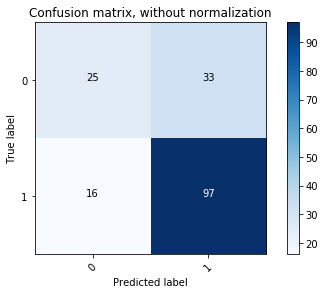

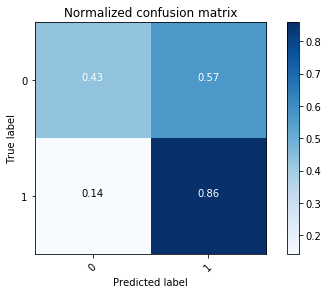

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#    --------------------------------------------
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y, run_cv(X,y,SVC))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()




In [20]:
print("Random Forest:")
print(accuracy(y, run_cv(X,y,RF)))

Random Forest:
[[40 18]
 [25 88]]
0.7485380116959064


In [21]:
print("K-nearest neighbors:")
print(accuracy(y, run_cv(X,y,KNN)))

K-nearest neighbors:
[[25 33]
 [26 87]]
0.6549707602339181


Confusion matrix, without normalization
[('Support Vector Machines', array([[23, 35],
       [16, 97]])), ('Random Forest', array([[34, 24],
       [22, 91]])), ('K-Nearest-Neighbors', array([[22, 36],
       [24, 89]]))]


ValueError: setting an array element with a sequence

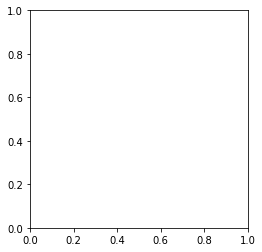

In [23]:
from sklearn.metrics import confusion_matrix

y = np.array(y)
class_names = np.unique(y)
#class_names = [0,1]

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,run_cv(X,y,RF)) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
]

# Pyplot code not included to reduce clutter
#from churn_display import draw_confusion_matrices
%matplotlib inline
classes_names=[0,1,0,1,0,1]
plot_confusion_matrix(confusion_matrices,class_names)

Confusion matrix, without normalization
[[37 21]
 [19 94]]
Normalized confusion matrix
[[0.64 0.36]
 [0.17 0.83]]


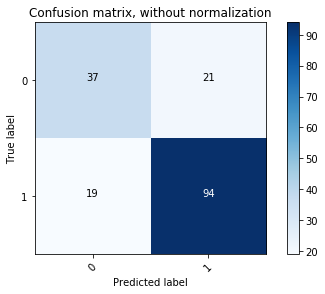

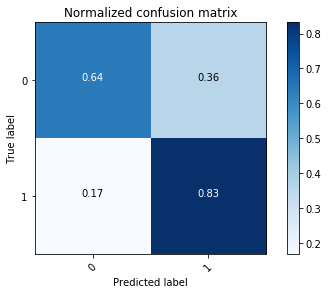

In [24]:
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y, run_cv(X,y,RF))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[27 31]
 [25 88]]
Normalized confusion matrix
[[0.47 0.53]
 [0.22 0.78]]


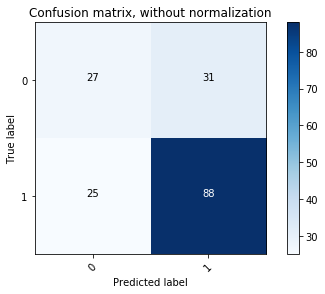

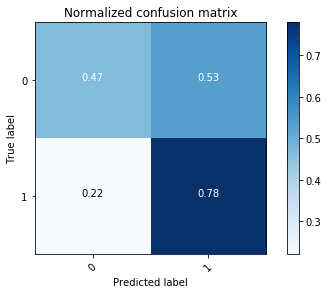

In [25]:
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y, run_cv(X,y,KNN))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X, y, RF, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,1.000000,49,0.877551
1,0.900000,13,0.846154
2,0.200000,13,0.384615
3,0.800000,13,0.615385
4,0.400000,11,0.454545
5,0.700000,11,0.454545
6,0.300000,10,0.300000
7,0.500000,10,0.400000
8,0.100000,9,0.333333
9,0.000000,7,0.714286


In [28]:
from ggplot import *
from ggplot.stats.stat_function import stat_function
%matplotlib inline

baseline = np.mean(is_churn)
ggplot(counts,aes(x='pred_prob',y='true_prob',size='count')) + \
    geom_point(color='blue') + \
    stat_function(fun = lambda x: x, color='red') + \
    stat_function(fun = lambda x: baseline, color='green') + \
    xlim(-0.05,  1.05) + ylim(-0.05,1.05) + \
    ggtitle("Random Forest") + \
    xlab("Predicted probability") + ylab("Relative frequency of outcome")

ModuleNotFoundError: No module named 'ggplot2'

In [27]:
from churn_measurements import calibration, discrimination

ModuleNotFoundError: No module named 'churn_measurements'

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X, y, RF, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,1.000000,37,0.891892
1,0.400000,15,0.466667
2,0.100000,13,0.230769
3,0.900000,11,0.818182
4,0.987500,11,1.000000
5,0.800000,11,0.818182
6,0.200000,11,0.363636
7,0.600000,10,0.500000
8,0.300000,9,0.333333
9,0.500000,8,0.625000


In [30]:
from ggplot import *
%matplotlib inline

baseline = np.mean(is_churn)
ggplot(counts,aes(x='pred_prob',y='true_prob',size='count')) + \
    geom_point(color='blue') + \
    stat_function(fun = lambda x: x, color='red') + \
    stat_function(fun = lambda x: baseline, color='green') + \
    xlim(-0.05,  1.05) + ylim(-0.05,1.05) + \
    ggtitle("Random Forest") + \
    xlab("Predicted probability") + ylab("Relative frequency of outcome")

ModuleNotFoundError: No module named 'ggplot'